<a href="https://colab.research.google.com/github/MrD0balina/Fourth-Year-Project---Neutrino-Oscillations/blob/main/Week%208%20-%20Contains%20all%20plots%20made%20thus%20far%20-%20Currently%20working%20on%20interpolation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MSci Y4 Two-term Project - SPA7015 Physics Investigative Project

Final Project Report Submission Date:  Friday of 'Week 13' in Term B (Friday 18th April @ 11:59PM)

Oral Presentation on QM+ Submission: Friday of week E0 - I assume E0 is the week after B13, so Friday 25th April @ 11:59PM

No checkpoint deadlines have been established as of yet.

In [171]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from scipy import interpolate

from textwrap import wrap
from math import cos
from math import pi
import pandas as pd

In [44]:
########################## THIRD TRY ##########################

################### Plot is produced when theta == 0 #####################
def Pion_to_Neutrino_converter_THIRD_TRY( theta):

        # NOTE: The mathematical structure of this function mimics the mathematics found in the PDF saved as: "(FIRST PLOTTING TASK) - An Off-Axis Neutrino Beam - Kirk T. McDonald - 0111033v1"

        E_pi_list_1 = []
        E_pi_list_2 = []
        E_v_list = []
        m_pi = 139.6 * ( 10 ** -3 )
        E_v_star = 29.8 * ( 10 ** -3 )
        E_pi_1_complex = 0
        E_pi_1_real = 0
        E_pi_2_complex = 0
        E_pi_2_real = 0
        E_pi_1_real_B = 0
        E_v = 0
        i = 0
        h = 10

        if theta == 0:
              for i in range(10000):
                    E_v_list.append(E_v)
                    E_pi_1_complex =  (  (m_pi * E_v )    /  (   E_v_star * 2  )   )
                    E_pi_1_real = E_pi_1_complex.real
                    E_pi_list_1.append(E_pi_1_real)
                    E_v = E_v + 0.001
                    E_v_list_reversed = []
                    E_pi_list_2 = []
                    i = i + 1


              return E_pi_list_1 , E_pi_list_2 , E_v_list , E_v_list_reversed


        else:

          while h > 0.000001:


                  E_v_list.append(E_v)

                  cos_theta_star_1 =  (  ( 1 - ( ( E_v ** 2 ) / ( E_v_star ** 2 ) ) * ( ( 1 / ( ( cos(theta) ) ** 2 ) ) - 1 ) ) ** ( 1 / 2 ) )  ## There is an issue in this line when theta = 0

                  E_pi_1_complex =  (  (m_pi * E_v )    /  (   E_v_star * ( 1 + cos_theta_star_1 )  )   )

                  E_pi_1_real_B = E_pi_1_complex.real

                  if E_pi_1_real_B != 0:

                      h = E_pi_1_real_B - E_pi_1_real


                  E_pi_1_real = E_pi_1_real_B

                  E_v = E_v + 0.001

                  E_pi_list_1.append(E_pi_1_real)


          E_v_list_reversed = list(reversed(E_v_list))


          for ele in E_v_list_reversed:

              if theta == 0:

                      return E_pi_list_1 , E_v_list
              else:

                      cos_theta_star_2 = - ( ( 1 - ( ( ele ** 2 ) / ( E_v_star ** 2 ) ) * ( ( 1 / ( ( cos(theta) ) ** 2 ) ) - 1 ) ) ** ( 1 / 2 ) )    ## There is an issue in this line when theta = 0



              if ( 1 + cos_theta_star_2) == 0:

              #    print("Error: division by zero for the ele: {ele}, cos_theta_star_2: {cos_theta_star_2}")

                  continue # Skip to the next iteration

              E_pi_2_complex =  (  (m_pi * E_v )    /  (   E_v_star * ( 1 + cos_theta_star_2 )  )   )
              E_pi_2_real = E_pi_2_complex.real
              E_pi_list_2.append(E_pi_2_real)

          del E_v_list_reversed[0]

          return E_pi_list_1 , E_pi_list_2 , E_v_list , E_v_list_reversed

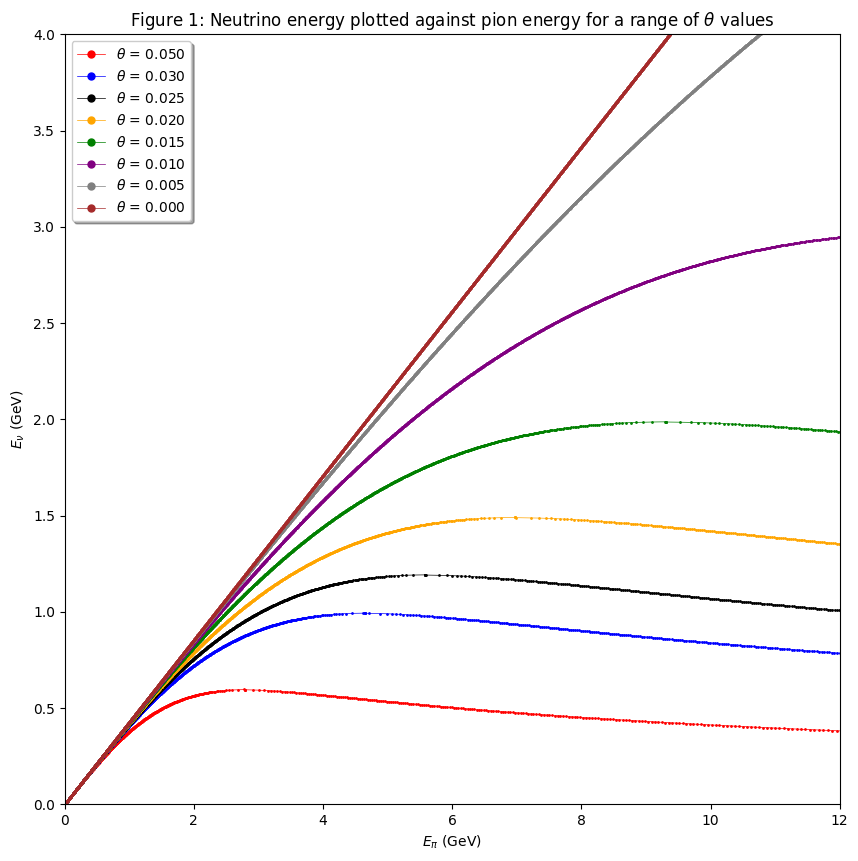

In [45]:
x_1 , x_2 , y_1, y_2 = Pion_to_Neutrino_converter_THIRD_TRY(theta = 0.05)
plt.figure(figsize=(10, 10))
plt.plot( x_1  , y_1 , "-o" , color = "r", linewidth = 0.5 , markersize = 1 , label = r'$\theta$ = 0.050'  )
plt.plot( x_2  , y_2 , "-o" , color = "r", linewidth = 0.5 , markersize = 1 )

#plt.scatter( x_1 , y_1 , s = 0.2 , c = "r" , marker = "x" , label = r'$\theta$ = 0.050'  )
#plt.scatter( x_2 , y_2 , s = 0.2 , c = "r" , marker = "x" )

x_1 , x_2 , y_1, y_2 = Pion_to_Neutrino_converter_THIRD_TRY(theta = 0.03)
plt.plot( x_1  , y_1 , "-o" , color = "b", linewidth = 0.5 , markersize = 1 , label = r'$\theta$ = 0.030'  )
plt.plot( x_2  , y_2 , "-o" , color = "b", linewidth = 0.5 , markersize = 1 )

#plt.scatter( x_1 , y_1 , s = 0.2 , c = "b" , marker = "x" , label = r'$\theta$ = 0.030' )
#plt.scatter( x_2 , y_2 , s = 0.2 , c = "b" , marker = "x" )

x_1 , x_2 , y_1, y_2 = Pion_to_Neutrino_converter_THIRD_TRY(theta = 0.025)
plt.plot( x_1  , y_1 , "-o" , color = "black", linewidth = 0.5 , markersize = 1 , label = r'$\theta$ = 0.025'  )
plt.plot( x_2 , y_2 , "-o" , color = "black", linewidth = 0.5 , markersize = 1  )

x_1 , x_2 , y_1, y_2 = Pion_to_Neutrino_converter_THIRD_TRY(theta = 0.02)
plt.plot( x_1  , y_1 , "-o" , color = "orange", linewidth = 0.5 , markersize = 1 , label = r'$\theta$ = 0.020'  )
plt.plot( x_2  , y_2 , "-o" , color = "orange", linewidth = 0.5 , markersize = 1 )

# plt.scatter( x_1 , y_1 , s = 0.2 , c = "orange" , marker = "x" , label = r'$\theta$ = 0.020' )
# plt.scatter( x_2 , y_2 , s = 0.2 , c = "orange" , marker = "x" )


x_1 , x_2 , y_1, y_2 = Pion_to_Neutrino_converter_THIRD_TRY(theta = 0.015)
plt.plot( x_1  , y_1 , "-o" , color = "green", linewidth = 0.5 , markersize = 1 , label = r'$\theta$ = 0.015'  )
plt.plot( x_2  , y_2 , "-o" , color = "green", linewidth = 0.5 , markersize = 1 )

# plt.scatter( x_1 , y_1 , s = 0.2 , c = "green" , marker = "x" , label = r'$\theta$ = 0.015' )
# plt.scatter( x_2 , y_2 , s = 0.2 , c = "green" , marker = "x" )


x_1 , x_2 , y_1, y_2 = Pion_to_Neutrino_converter_THIRD_TRY(theta = 0.01)
plt.plot( x_1  , y_1 , "-o" , color = "purple", linewidth = 0.5 , markersize = 1 , label = r'$\theta$ = 0.010'  )
plt.plot( x_2  , y_2 , "-o" , color = "purple", linewidth = 0.5 , markersize = 1 )

#plt.scatter( x_1 , y_1 , s = 0.2 , c = "purple" , marker = "x" , label = r'$\theta$ = 0.010' )
#plt.scatter( x_2 , y_2 , s = 0.2 , c = "purple" , marker = "x" )

x_1 , x_2 , y_1, y_2 = Pion_to_Neutrino_converter_THIRD_TRY(theta = 0.005)
plt.plot( x_1  , y_1 , "-o" , color = "gray", linewidth = 0.5 , markersize = 1 , label = r'$\theta$ = 0.005'  )
plt.plot( x_2  , y_2 , "-o" , color = "gray", linewidth = 0.5 , markersize = 1   )

# plt.scatter( x_1 , y_1 , s = 0.2 , c = "gray" , marker = "x" , label = r'$\theta$ = 0.005' )
# plt.scatter( x_2 , y_2 , s = 0.2 , c = "gray" , marker = "x" )

x_1 , x_2 , y_1, y_2 = Pion_to_Neutrino_converter_THIRD_TRY(theta = 0)
plt.plot( x_1  , y_1 , "-o" , color = "brown", linewidth = 0.5 , markersize = 1 , label = r'$\theta$ = 0.000'  )
plt.plot( x_2  , y_2 , "-o" , color = "brown", linewidth = 0.5 , markersize = 1 )


# plt.scatter( x_1 , y_1 , s = 0.2 , c = "brown" , marker = "x" , label = r'$\theta$ = 0.000' )
# plt.scatter( x_2 , y_2 , s = 0.2 , c = "brown" , marker = "x" )

r'$\lambda$'

plt.title(r"Figure 1: Neutrino energy plotted against pion energy for a range of $\theta$ values")
plt.xlabel(r"$E_{\pi}$ (GeV)")
plt.ylabel(r"$E_{\nu}$ (GeV)")
plt.legend(scatterpoints = 1 , markerscale = 5 , shadow = True , fancybox = True)
plt.xlim(0, 12)
plt.ylim(0, 4 )


plt.savefig('Figure 1: Nu_E-against-Pi_E.png' , dpi=200 , bbox_inches = "tight")


plt.show()


Note: Figure 1 (showing neutrino energy plotted against pion energy for a range of theta values) is based off of a plot in the document saved as: "(FIRST PLOTTING TASK) - An Off-Axis Neutrino Beam - Kirk T. McDonald - 0111033v1"



In [46]:
m_pi = 139.6 * ( 10 ** -3 )        # Units = GeV ( Source = PDF saved as: "(FIRST PLOTTING TASK) - An Off-Axis Neutrino Beam - Kirk T. McDonald - 0111033v1" )

E_v_star = 29.8 * ( 10 ** -3 )     # Units = GeV ( Source =  = PDF saved as: "(FIRST PLOTTING TASK) - An Off-Axis Neutrino Beam - Kirk T. McDonald - 0111033v1" )

E_pro = 12                     # Units = GeV  ( Source = https://en.wikipedia.org/wiki/Fermilab#Fermilab_Accelerator_Complex )

In [47]:
####################### SECOND TRY AT SECOND PLOTTING FUNCTION ######################

def Relative_Neutrino_Flux_Plotter_SECOND_TRY( theta ):

        # NOTE: The mathematical structure of this function mimics the mathematics found in the PDF saved as: "(FIRST PLOTTING TASK) - An Off-Axis Neutrino Beam - Kirk T. McDonald - 0111033v1"

        E_v = np.linspace( 0 , 4 , 100 )

        cos_theta_star = (  ( 1 - ( ( E_v ** 2 ) / ( E_v_star ** 2 ) ) * ( ( 1 / ( ( cos(theta) ) ** 2 ) ) - 1 ) ) ** ( 1 / 2 ) )

        E_pi = (  (m_pi * E_v )    /  (   E_v_star * ( 1 + cos_theta_star )  )   )

        Rel_Neu_Flux = ( ( ( E_pro - E_pi ) ** 5 ) * ( ( E_pi * E_v ) / ( cos_theta_star ) ) )

        Rel_Neu_Flux[np.isnan(Rel_Neu_Flux)] = 0

        for i in range(1, len(Rel_Neu_Flux)):
                neighbouring_element_difference = (Rel_Neu_Flux[i] - Rel_Neu_Flux[i-1])

                if neighbouring_element_difference == 0.00:

                        break
                else:

                        continue

        Rel_Neu_Flux = Rel_Neu_Flux[:i]

        E_v = E_v[:i]

        return E_v , Rel_Neu_Flux

<ipython-input-47-2edc343f42f4>:9: RuntimeWarning: invalid value encountered in sqrt
  cos_theta_star = (  ( 1 - ( ( E_v ** 2 ) / ( E_v_star ** 2 ) ) * ( ( 1 / ( ( cos(theta) ) ** 2 ) ) - 1 ) ) ** ( 1 / 2 ) )


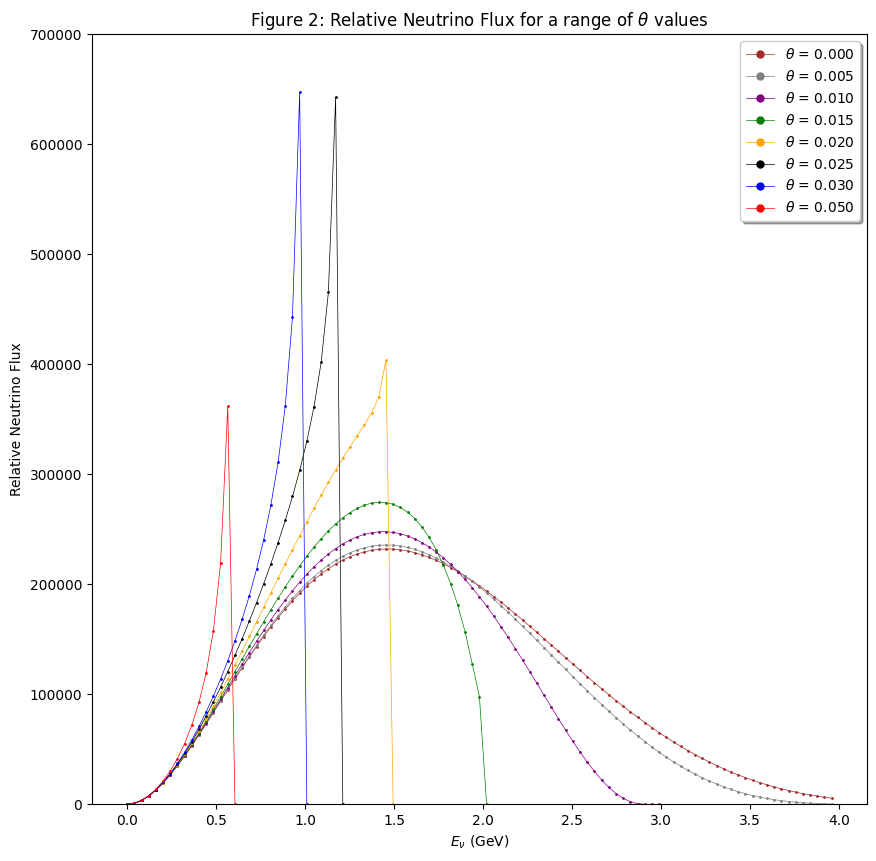

In [48]:

x_1 , y_1 = Relative_Neutrino_Flux_Plotter_SECOND_TRY( 0.0 )
plt.figure(figsize=(10, 10))
plt.plot( x_1 , y_1 , "-o" , color = "brown", linewidth = 0.5 , markersize = 1, label = r'$\theta$ = 0.000' )

x_1 , y_1 = Relative_Neutrino_Flux_Plotter_SECOND_TRY( 0.005 )
plt.plot( x_1 , y_1 , "-o" , color = "gray", linewidth = 0.5 , markersize = 1, label = r'$\theta$ = 0.005' )

x_1 , y_1 = Relative_Neutrino_Flux_Plotter_SECOND_TRY( 0.010 )
plt.plot( x_1 , y_1 , "-o" , color = "purple", linewidth = 0.5 , markersize = 1, label = r'$\theta$ = 0.010' )

x_1 , y_1 = Relative_Neutrino_Flux_Plotter_SECOND_TRY( 0.015 )
plt.plot( x_1 , y_1 , "-o" , color = "green", linewidth = 0.5 , markersize = 1, label = r'$\theta$ = 0.015' )

x_1 , y_1 = Relative_Neutrino_Flux_Plotter_SECOND_TRY( 0.020 )
plt.plot( x_1 , y_1 , "-o" , color = "orange", linewidth = 0.5 , markersize = 1, label = r'$\theta$ = 0.020' )

x_1 , y_1 = Relative_Neutrino_Flux_Plotter_SECOND_TRY( 0.025 )
plt.plot( x_1 , y_1 , "-o" , color = "black", linewidth = 0.5 , markersize = 1, label = r'$\theta$ = 0.025' )

x_1 , y_1 = Relative_Neutrino_Flux_Plotter_SECOND_TRY( 0.030 )
plt.plot( x_1 , y_1 , "-o" , color = "blue", linewidth = 0.5 , markersize = 1, label = r'$\theta$ = 0.030' )

x_1 , y_1 = Relative_Neutrino_Flux_Plotter_SECOND_TRY( 0.050 )
plt.plot( x_1 , y_1 , "-o" , color = "red", linewidth = 0.5 , markersize = 1, label = r'$\theta$ = 0.050' )

plt.title(r"Figure 2: Relative Neutrino Flux for a range of $\theta$ values")

plt.legend(scatterpoints = 1 , markerscale = 5 , shadow = True , fancybox = True)

plt.xlabel(r"$E_{\nu}$ (GeV)")
plt.ylabel("Relative Neutrino Flux")

# plt.xlim(0, 4)
plt.ylim(0, 7e5)

plt.savefig('Figure 2: Relative Neutrino Flux for a range of Theta values.png' , dpi=200 , bbox_inches = "tight")

plt.show()


NOTE: Much like Figure 1, Figure 2 is a plot that uses a plot in the document saved as "(FIRST PLOTTING TASK) - An Off-Axis Neutrino Beam - Kirk T. McDonald - 0111033v1", as a template.

#QUESTIONS:
#How far away is the near detector from the graphite target?
#Where does the neutrino beam "begin"?  Maybe it is after the graphite target.... perhaps after the decay tubes?
#What is the standard deviation of the proton energy distribution for protons coming out of the Main Injector?
#Can I get a plot showing the distribution of proton energies or momenta in the proton beam leaving the main injector?
#I know Main Injector beam proton momenta is 120GeV/c, if I can get information on the distribution of proton momenta in the longitudinal (z) direction, I could use this to inform me on the standard deviation I should be applying to the gaussian normally distributed array of protons I am generating in my code below.

I looked for an answer to this and found nothing in the following documents:
- https://cds.cern.ch/record/554701/files/mopa005.pdf  (published 2001)
- https://beamdocs.fnal.gov/AD/DocDB/0042/004294/001/fermilab-design-1994-01.pdf (published 1995)

##POSSIBLE ANSWER IN TABLE 1 OF THIS DOCUMENT:

- https://journals.aps.org/prab/pdf/10.1103/PhysRevSTAB.16.071001

1.   This document pointed me in the direction of beam "admittance"
2.   That then lead to me reading about beam "acceptance", Wikipedia claims that beam acceptance and admttance are the same thing?
3.   I then shifted focus to beam "emittance".  Wikipedia claims that beam admittance (or acceptance) is the maximum emittance that a beam transport system or analysing system is able to transmit.
4.  Beam emittance is a property of a charged particle beam.  It is the area occupied by the beam in a position and mimentum phase space.
5. A beam exists in 3 dimensions, so there are 6 position and momenta coordinates.
6. So, I just need the 2 dimensional graph of position along z axis against momentum along the z axis.
7. Emittance along each axis is independent unless the beam passes through a solenoid magnet.  The magnet then correlates the emittance along the different axes.  Hence, I need the proton beam emittance after it has travelled through the last focusing magnet before hitting the target.  Beam emittance is conserved under conservative forces (Liouville's Theorem).
8. Low emittance is desirable, it means that the particles that constitute the beam are all in very similar positions are are all travelling with very similar momentum.  The protons that constitute the beam are more likely to end up going to where you want them to go.

##POSSIBLE MAIN INJECTOR BEAM EMITTANCE INFO IN THIS DOCUMENT:

- https://lss.fnal.gov/archive/2008/conf/fermilab-conf-08-665-ad.pdf

1.  Table with NuMI Beam Parameters
2.  Strangely blank figures!! FIGURE 11 IS BLANK?  But it could have been useful I think?






In [51]:
####################### FIRST TRY RELATIVE NEUTRINO FLUX WITH PROTON ENERGY UNCERTAINTY ######################

#### FUNCTION DOES NOT INCLUDE PION WEIGHTING ####

def FIRST_TRY_Relative_Neutrino_Flux_Plotter_with_Proton_Energy_Uncertainty( theta ):

        E_v = np.linspace( 0 , 4 , 10000000 )

        my_mean = 120

        my_std = 12   # standard deviation, "spread" or "width"    #### WHAT IS THE STANDARD DEVITAITON OF THE PROTON ENERGY DISTRIBUTION FOR PROTONS COMING OUT OF THE MAIN INJECTOR? ####
                                                                   #### My standard deviation is very large ####

        E_pro_array = np.random.normal(loc = my_mean, scale = my_std, size=10000000) ## Producing an array of proton energies.

        cos_theta_star = (  ( 1 - ( ( E_v ** 2 ) / ( E_v_star ** 2 ) ) * ( ( 1 / ( ( cos(theta) ) ** 2 ) ) - 1 ) ) ** ( 1 / 2 ) )

        E_pi = (  (m_pi * E_v )    /  (   E_v_star * ( 1 + cos_theta_star )  )   )

        #### FUNCTION DOES NOT INCLUDE PION WEIGHTING ####

        Rel_Neu_Flux = ( ( ( E_pro - E_pi ) ** 5 ) * ( ( E_pi * E_v ) / ( cos_theta_star ) ) )

        Rel_Neu_Flux[np.isnan(Rel_Neu_Flux)] = 0

        for i in range(1, len(Rel_Neu_Flux)):
                neighbouring_element_difference = (Rel_Neu_Flux[i] - Rel_Neu_Flux[i-1])

                if neighbouring_element_difference == 0.000:

                        break
                else:

                        continue

        Rel_Neu_Flux = Rel_Neu_Flux[:i]

        E_v = E_v[:i]

        return E_v , Rel_Neu_Flux , E_pro_array

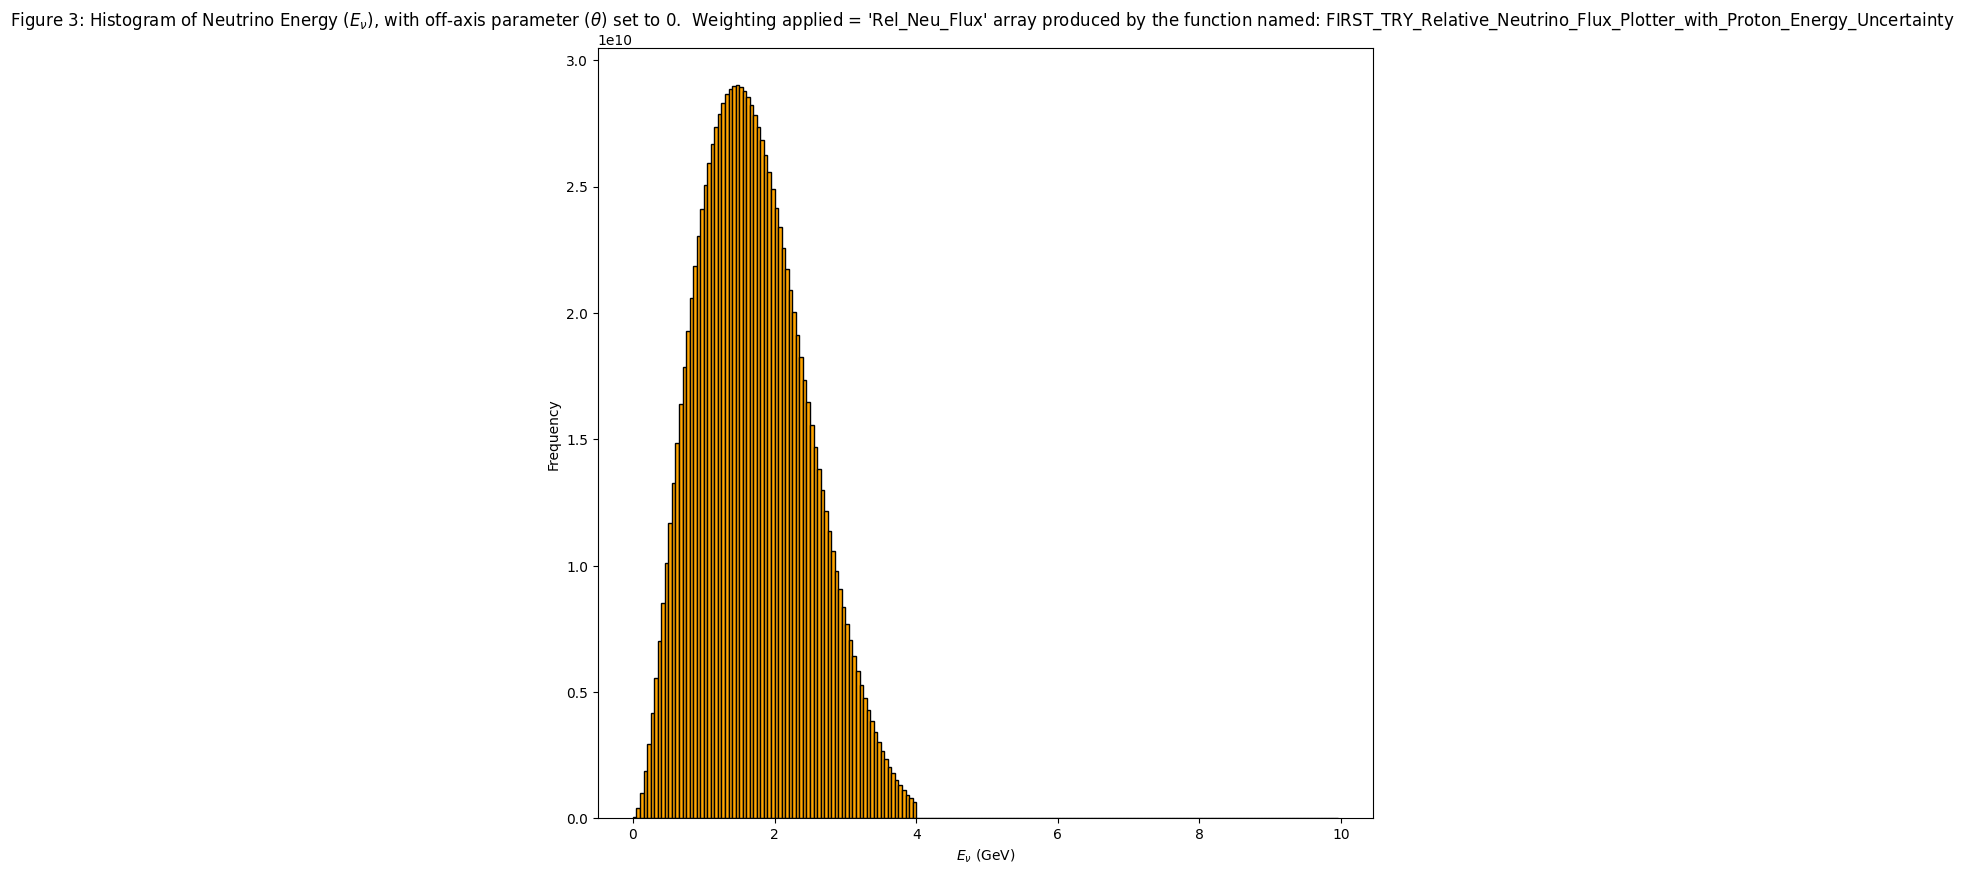

In [52]:
x_1 , y_1 , z_1 = FIRST_TRY_Relative_Neutrino_Flux_Plotter_with_Proton_Energy_Uncertainty( 0.00 )

plt.figure(figsize=(10, 10))
#plt.plot( x_1 , y_1 , "-o" , color = "brown", linewidth = 0.5 , markersize = 1, label = r'$\theta$ = 0.014' )

plt.hist( x_1 , bins = np.arange( 0 , 10 , 0.05 )  , weights =  y_1 , edgecolor = "black" , ls = "-" , color = "orange" )

plt.title(r"Figure 3: Histogram of Neutrino Energy ($E_{\nu}$), with off-axis parameter ($\theta$) set to 0.  Weighting applied = 'Rel_Neu_Flux' array produced by the function named: FIRST_TRY_Relative_Neutrino_Flux_Plotter_with_Proton_Energy_Uncertainty  ")

plt.xlabel(r"$E_{\nu}$ (GeV)")
plt.ylabel("Frequency")

plt.show()

In [53]:
## Displaying the Array of Proton Energies
## This array is produced in the function named: FIRST_TRY_Relative_Neutrino_Flux_Plotter_with_Proton_Energy_Uncertainty

display(type(z_1))

display(np.shape(z_1))

display(z_1)


numpy.ndarray

(10000000,)

array([136.64926319, 112.80820178, 126.70374617, ..., 125.16199977,
       111.84243431, 106.24963431])

numpy.ndarray

array([136.64926319, 112.80820178, 126.70374617, ..., 125.16199977,
       111.84243431, 106.24963431])

(array([   9074.,   24704.,   59881.,  129686.,  250401.,  434071.,
         674639.,  938072., 1169370., 1305512., 1306355., 1168491.,
         938447.,  673923.,  434555.,  250620.,  130151.,   59484.,
          24707.]),
 array([ 80.,  84.,  88.,  92.,  96., 100., 104., 108., 112., 116., 120.,
        124., 128., 132., 136., 140., 144., 148., 152., 156.]),
 <BarContainer object of 19 artists>)

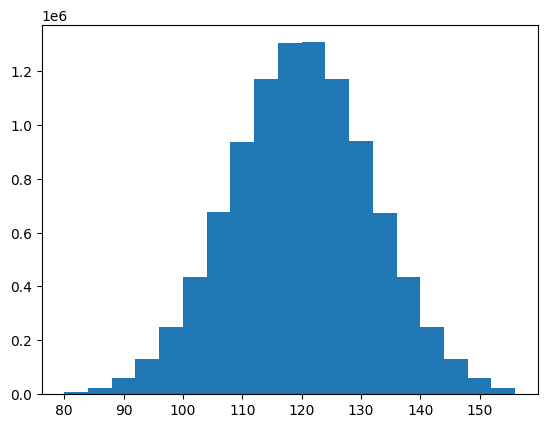

In [54]:
# plt.hist( E_pro , bins = np.arange( 0 , 500 , 5 ) )

display(type(z_1))
display(z_1)

plt.hist( z_1 , bins = np.arange( 80 , 160 , 4 ) )

In [ ]:
# ## The notebook was unable to read the CSV file.  So, I saved it as a CSV UTF-8 file and it worked..

# Pion_Plots_df1 = pd.read_csv('Pion Plots TABLE 1 CSV.csv')

In [55]:
## Notebook was able to read in the CSV UTF-8 file

#### USEFUL INFO CONCNERNING THE PAPER FROM WHICH THE TABLE WAS PULLED #####

## (POT) means "per proton on target"
## p_{z} = magnitude of pion longitudinal momentum
## p_{T} = magnitude of pion transversal momentum


In [65]:
## Reading in data from 2014 study; "Measurement of charged pion production yields offf the NuMI target"

Pion_Plots_df1 = pd.read_csv('Week 6 - Pion Plots TABLE 1 CSV - Copy - Now Saved as UTF 8 - Pion Plots TABLE 1 CSV - Copy - Now Saved as UTF 8.csv')

# display(Pion_Plots_df1.head(3))
# display(Pion_Plots_df1.columns)

header_column_names = Pion_Plots_df1.loc[0, :].values.flatten().tolist()

# display(header_column_names)

Pion_Plots_df1 = Pion_Plots_df1.set_axis( header_column_names , axis = 1  )

Pion_Plots_df1 = Pion_Plots_df1.drop(0)

Pion_Plots_df1.columns = ['pz (GeV=c)',
                          'pT (GeV=c)',
                          '$N_{\pi^+}/POT$ (per proton on target)',
                          'ðN(pi^+) stat + bkgd (%)',
                          'ðN(pi^+) syst (%)',
                          '$N_{\pi^-}/POT$ (per proton on target)',
                          'ðN(pi^-) stat + bkgd (%)',
                          'ðN(pi^-) syst (%)',
                          'R = N(pi^-) / N(pi^+)',
                          'ðR stat + bkgd (%)',
                          'ðR syst (%)']

display(Pion_Plots_df1.head(3))

,pz (GeV=c),pT (GeV=c),$N_{\pi^+}/POT$ (per proton on target),ðN(pi^+) stat + bkgd (%),ðN(pi^+) syst (%),$N_{\pi^-}/POT$ (per proton on target),ðN(pi^-) stat + bkgd (%),ðN(pi^-) syst (%),R = N(pi^-) / N(pi^+),ðR stat + bkgd (%),ðR syst (%)
1,"[0.30,0.50)","[0.00,0.10)",3.32E-01,0.97,9.77,2.76E-01,0.86,9.09,0.84,1.29,5.19
2,"[0.30,0.50)","[0.10,0.20)",3.25E-01,1.05,4.86,3.56E-01,0.75,4.93,1.08,1.29,4.64
3,"[0.30,0.50)","[0.20,0.30)",1.93E-01,1.46,5.30,1.91E-01,1.09,5.24,1,1.82,4.59


In [57]:
X = Pion_Plots_df1['pz (GeV=c)'][8]
print(type(X))
print(X)
Y = X [ 1 : -1 ]
print(Y)
Z =  Y.split(",")
print(Z)
print(type(Z[0]))
#Z = float(Z[1])
#diff = float(Z) - float(M)
#print(abs(diff) )

print(min(Z))
print(type(Z[0]))
print(max(Z))
print(type(Z[1]))

sum = max(Z) + min(Z)
print(sum)

<class 'str'>
[0.50,0.62)
0.50,0.62
['0.50', '0.62']
<class 'str'>
0.50
<class 'str'>
0.62
<class 'str'>
0.620.50


In [58]:
#A = [ "0.05" , "0.1"  ]
A = [ "a" , "b"  ]
B = [ "b" , "a"  ]
C = [ "0.0199999999999" , "0.02"  ]
print(min(C))
print(type(C[0]))
print(max(C))

0.0199999999999
<class 'str'>
0.02


In [59]:
print(Pion_Plots_df1['pz (GeV=c)'])

1        [0.30,0.50)
2        [0.30,0.50)
3        [0.30,0.50)
4        [0.30,0.50)
5        [0.50,0.62)
           ...      
120    [56.00,68.00)
121    [68.00,80.00)
122    [68.00,80.00)
123    [68.00,80.00)
124    [68.00,80.00)
Name: pz (GeV=c), Length: 124, dtype: object


In [60]:
## Converting the first column of the dataframe from string to float values.

## Calculating the bin width of each row

interval_mid_list = []
bin_width_list = []

for i in range(len(Pion_Plots_df1['pz (GeV=c)'])):

  i = i + 1
  X = Pion_Plots_df1['pz (GeV=c)'][i]
  Y = X [ 1 : -1 ]
  Z =  Y.split(",")

  for j in range(len(Z)):
    Z[j] = float(Z[j])

  diff = abs( ( Z[0] - Z[1] ) / 2  )

  bin_width_list.append(diff)

  interval_mid_value = min(Z) + diff
  diff = 0
  interval_mid_list.append(interval_mid_value)

#display(interval_mid_list)
bin_width_array = np.array(bin_width_list)
interval_mid_array = np.array(interval_mid_list)
display(np.shape(interval_mid_array))
display(np.shape(Pion_Plots_df1['pz (GeV=c)']))

(124,)

(124,)

In [67]:
## Adding a column to the dataframe that displays the bin width of each row.

Pion_Plots_df1['pz (GeV=c) - mid range value'] = interval_mid_array.tolist()

Pion_Plots_df1['bin width'] = bin_width_array.tolist()



display(Pion_Plots_df1.head(5))


,pz (GeV=c),pT (GeV=c),$N_{\pi^+}/POT$ (per proton on target),ðN(pi^+) stat + bkgd (%),ðN(pi^+) syst (%),$N_{\pi^-}/POT$ (per proton on target),ðN(pi^-) stat + bkgd (%),ðN(pi^-) syst (%),R = N(pi^-) / N(pi^+),ðR stat + bkgd (%),ðR syst (%),pz (GeV=c) - mid range value,bin width
1,"[0.30,0.50)","[0.00,0.10)",3.32E-01,0.97,9.77,2.76E-01,0.86,9.09,0.84,1.29,5.19,0.40,0.10
2,"[0.30,0.50)","[0.10,0.20)",3.25E-01,1.05,4.86,3.56E-01,0.75,4.93,1.08,1.29,4.64,0.40,0.10
3,"[0.30,0.50)","[0.20,0.30)",1.93E-01,1.46,5.30,1.91E-01,1.09,5.24,1,1.82,4.59,0.40,0.10
4,"[0.30,0.50)","[0.30,0.40)",1.06E-01,1.97,8.15,9.49E-02,1.68,7.39,0.95,2.59,4.61,0.40,0.10
5,"[0.50,0.62)","[0.00,0.10)",9.20E-02,1.22,5.10,7.54E-02,1.16,4.98,0.83,1.69,4.59,0.56,0.06


In [68]:
column_to_move = Pion_Plots_df1.pop("pz (GeV=c) - mid range value")

Pion_Plots_df1.insert(1, "pz (GeV=c) - mid range value", column_to_move)

column_to_move = Pion_Plots_df1.pop("bin width")

Pion_Plots_df1.insert(2, "bin width", column_to_move)


In [69]:
display(Pion_Plots_df1.head(5))

,pz (GeV=c),pz (GeV=c) - mid range value,bin width,pT (GeV=c),$N_{\pi^+}/POT$ (per proton on target),ðN(pi^+) stat + bkgd (%),ðN(pi^+) syst (%),$N_{\pi^-}/POT$ (per proton on target),ðN(pi^-) stat + bkgd (%),ðN(pi^-) syst (%),R = N(pi^-) / N(pi^+),ðR stat + bkgd (%),ðR syst (%)
1,"[0.30,0.50)",0.40,0.10,"[0.00,0.10)",3.32E-01,0.97,9.77,2.76E-01,0.86,9.09,0.84,1.29,5.19
2,"[0.30,0.50)",0.40,0.10,"[0.10,0.20)",3.25E-01,1.05,4.86,3.56E-01,0.75,4.93,1.08,1.29,4.64
3,"[0.30,0.50)",0.40,0.10,"[0.20,0.30)",1.93E-01,1.46,5.30,1.91E-01,1.09,5.24,1,1.82,4.59
4,"[0.30,0.50)",0.40,0.10,"[0.30,0.40)",1.06E-01,1.97,8.15,9.49E-02,1.68,7.39,0.95,2.59,4.61
5,"[0.50,0.62)",0.56,0.06,"[0.00,0.10)",9.20E-02,1.22,5.10,7.54E-02,1.16,4.98,0.83,1.69,4.59


In [70]:
Pion_Plots_df1.columns

Index(['pz (GeV=c)', 'pz (GeV=c) - mid range value', 'bin width', 'pT (GeV=c)',
       '$N_{\pi^+}/POT$ (per proton on target)', 'ðN(pi^+) stat + bkgd (%)',
       'ðN(pi^+) syst (%)', '$N_{\pi^-}/POT$ (per proton on target)',
       'ðN(pi^-) stat + bkgd (%)', 'ðN(pi^-) syst (%)',
       'R = N(pi^-) / N(pi^+)', 'ðR stat + bkgd (%)', 'ðR syst (%)'],
      dtype='object')

In [71]:
# pT_colour_code_list = []

# for i in range(len(Pion_Plots_df1['pT (GeV=c)'])):

#   i = i + 1
#   X = Pion_Plots_df1['pT (GeV=c)'][i]
#   Y = X [ 1 : -1 ]
#   Z =  Y.split(",")

#   for j in range(len(Z)):
#     Z[j] = float(Z[j])

#   if Z[0] == 0.00:
#     colour_code = "blue"
#   elif Z[0] == 0.10:
#     colour_code = "red"
#   elif Z[0] == 0.20:
#     colour_code = "green"
#   elif Z[0] == 0.30:
#     colour_code = "purple"
#   elif Z[0] == 0.40:
#     colour_code = "orange"
#   else:
#     colour_code = "brown"

#   pT_colour_code_list.append(colour_code)

# pT_colour_code_array = np.array(pT_colour_code_list)
# display(np.shape(pT_colour_code_array))
# display(np.shape(Pion_Plots_df1['pT (GeV=c)']))

In [72]:
pT_colour_code_list = []

for i in range(len(Pion_Plots_df1['pT (GeV=c)'])):

  i = i + 1
  X = Pion_Plots_df1['pT (GeV=c)'][i]
  Y = X [ 1 : -1 ]
  Z =  Y.split(",")

  for j in range(len(Z)):
    Z[j] = float(Z[j])

  if Z[0] == 0.00:
    colour_code = 0
  elif Z[0] == 0.10:
    colour_code = 1
  elif Z[0] == 0.20:
    colour_code = 2
  elif Z[0] == 0.30:
    colour_code = 3
  elif Z[0] == 0.40:
    colour_code = 4
  else:
    colour_code = 5

  pT_colour_code_list.append(colour_code)

pT_colour_code_array = np.array(pT_colour_code_list)
display(np.shape(pT_colour_code_array))
display(np.shape(Pion_Plots_df1['pT (GeV=c)']))

(124,)

(124,)

In [73]:
Pion_Plots_df1['pT (GeV=c) - plot colour codes'] = pT_colour_code_array.tolist()
column_to_move = Pion_Plots_df1.pop("pT (GeV=c) - plot colour codes")
Pion_Plots_df1.insert(3, "pT (GeV=c) - plot colour codes", column_to_move)
display(Pion_Plots_df1.head(5))

,pz (GeV=c),pz (GeV=c) - mid range value,bin width,pT (GeV=c) - plot colour codes,pT (GeV=c),$N_{\pi^+}/POT$ (per proton on target),ðN(pi^+) stat + bkgd (%),ðN(pi^+) syst (%),$N_{\pi^-}/POT$ (per proton on target),ðN(pi^-) stat + bkgd (%),ðN(pi^-) syst (%),R = N(pi^-) / N(pi^+),ðR stat + bkgd (%),ðR syst (%)
1,"[0.30,0.50)",0.40,0.10,0,"[0.00,0.10)",3.32E-01,0.97,9.77,2.76E-01,0.86,9.09,0.84,1.29,5.19
2,"[0.30,0.50)",0.40,0.10,1,"[0.10,0.20)",3.25E-01,1.05,4.86,3.56E-01,0.75,4.93,1.08,1.29,4.64
3,"[0.30,0.50)",0.40,0.10,2,"[0.20,0.30)",1.93E-01,1.46,5.30,1.91E-01,1.09,5.24,1,1.82,4.59
4,"[0.30,0.50)",0.40,0.10,3,"[0.30,0.40)",1.06E-01,1.97,8.15,9.49E-02,1.68,7.39,0.95,2.59,4.61
5,"[0.50,0.62)",0.56,0.06,0,"[0.00,0.10)",9.20E-02,1.22,5.10,7.54E-02,1.16,4.98,0.83,1.69,4.59


In [74]:
print(Pion_Plots_df1.dtypes)

pz (GeV=c)                                 object
pz (GeV=c) - mid range value              float64
bin width                                 float64
pT (GeV=c) - plot colour codes              int64
pT (GeV=c)                                 object
$N_{\pi^+}/POT$ (per proton on target)     object
ðN(pi^+) stat + bkgd (%)                   object
ðN(pi^+) syst (%)                         float64
$N_{\pi^-}/POT$ (per proton on target)     object
ðN(pi^-) stat + bkgd (%)                   object
ðN(pi^-) syst (%)                         float64
R = N(pi^-) / N(pi^+)                      object
ðR stat + bkgd (%)                         object
ðR syst (%)                               float64
dtype: object


In [75]:
Pion_Plots_df1["N_{\pi^+}/POT --- float"] = Pion_Plots_df1["$N_{\pi^+}/POT$ (per proton on target)"].astype(float)

column_to_move = Pion_Plots_df1.pop("N_{\pi^+}/POT --- float")
Pion_Plots_df1.insert(5, "N_{\pi^+}/POT --- float", column_to_move)
display(Pion_Plots_df1.head(-5))

,pz (GeV=c),pz (GeV=c) - mid range value,bin width,pT (GeV=c) - plot colour codes,pT (GeV=c),N_{\pi^+}/POT --- float,$N_{\pi^+}/POT$ (per proton on target),ðN(pi^+) stat + bkgd (%),ðN(pi^+) syst (%),$N_{\pi^-}/POT$ (per proton on target),ðN(pi^-) stat + bkgd (%),ðN(pi^-) syst (%),R = N(pi^-) / N(pi^+),ðR stat + bkgd (%),ðR syst (%)
1,"[0.30,0.50)",0.40,0.10,0,"[0.00,0.10)",0.332000,3.32E-01,0.97,9.77,2.76E-01,0.86,9.09,0.84,1.29,5.19
2,"[0.30,0.50)",0.40,0.10,1,"[0.10,0.20)",0.325000,3.25E-01,1.05,4.86,3.56E-01,0.75,4.93,1.08,1.29,4.64
3,"[0.30,0.50)",0.40,0.10,2,"[0.20,0.30)",0.193000,1.93E-01,1.46,5.30,1.91E-01,1.09,5.24,1,1.82,4.59
4,"[0.30,0.50)",0.40,0.10,3,"[0.30,0.40)",0.106000,1.06E-01,1.97,8.15,9.49E-02,1.68,7.39,0.95,2.59,4.61
5,"[0.50,0.62)",0.56,0.06,0,"[0.00,0.10)",0.092000,9.20E-02,1.22,5.10,7.54E-02,1.16,4.98,0.83,1.69,4.59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,"[56.00,68.00)",62.00,6.00,0,"[0.00,0.10)",0.000190,1.90E-04,11.86,4.92,NaN,NaN,NaN,NaN,NaN,NaN
116,"[56.00,68.00)",62.00,6.00,1,"[0.10,0.20)",0.000424,4.24E-04,9.19,4.65,8.79E-05,16.67,5.70,0.19,19.03,4.58
117,"[56.00,68.00)",62.00,6.00,2,"[0.20,0.30)",0.000580,5.80E-04,6.28,5.96,1.71E-04,11.59,4.69,0.36,13.18,4.58
118,"[56.00,68.00)",62.00,6.00,3,"[0.30,0.40)",0.000627,6.27E-04,5.64,4.68,1.52E-04,11.85,5.76,0.3,13.12,4.58


In [76]:
## We divide the count by the bin width.  When we make the height of each bin the count divided by the bin width, the total area of the bin is equal to the count.

Pion_Plots_df1["N_{\pi^+}/POT / bin width"]  =  Pion_Plots_df1["N_{\pi^+}/POT --- float"] / Pion_Plots_df1["bin width"]
column_to_move = Pion_Plots_df1.pop("N_{\pi^+}/POT / bin width")
Pion_Plots_df1.insert(6, "N_{\pi^+}/POT / bin width", column_to_move)
display(Pion_Plots_df1.head(-5))

,pz (GeV=c),pz (GeV=c) - mid range value,bin width,pT (GeV=c) - plot colour codes,pT (GeV=c),N_{\pi^+}/POT --- float,N_{\pi^+}/POT / bin width,$N_{\pi^+}/POT$ (per proton on target),ðN(pi^+) stat + bkgd (%),ðN(pi^+) syst (%),$N_{\pi^-}/POT$ (per proton on target),ðN(pi^-) stat + bkgd (%),ðN(pi^-) syst (%),R = N(pi^-) / N(pi^+),ðR stat + bkgd (%),ðR syst (%)
1,"[0.30,0.50)",0.40,0.10,0,"[0.00,0.10)",0.332000,3.320000,3.32E-01,0.97,9.77,2.76E-01,0.86,9.09,0.84,1.29,5.19
2,"[0.30,0.50)",0.40,0.10,1,"[0.10,0.20)",0.325000,3.250000,3.25E-01,1.05,4.86,3.56E-01,0.75,4.93,1.08,1.29,4.64
3,"[0.30,0.50)",0.40,0.10,2,"[0.20,0.30)",0.193000,1.930000,1.93E-01,1.46,5.30,1.91E-01,1.09,5.24,1,1.82,4.59
4,"[0.30,0.50)",0.40,0.10,3,"[0.30,0.40)",0.106000,1.060000,1.06E-01,1.97,8.15,9.49E-02,1.68,7.39,0.95,2.59,4.61
5,"[0.50,0.62)",0.56,0.06,0,"[0.00,0.10)",0.092000,1.533333,9.20E-02,1.22,5.10,7.54E-02,1.16,4.98,0.83,1.69,4.59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,"[56.00,68.00)",62.00,6.00,0,"[0.00,0.10)",0.000190,0.000032,1.90E-04,11.86,4.92,NaN,NaN,NaN,NaN,NaN,NaN
116,"[56.00,68.00)",62.00,6.00,1,"[0.10,0.20)",0.000424,0.000071,4.24E-04,9.19,4.65,8.79E-05,16.67,5.70,0.19,19.03,4.58
117,"[56.00,68.00)",62.00,6.00,2,"[0.20,0.30)",0.000580,0.000097,5.80E-04,6.28,5.96,1.71E-04,11.59,4.69,0.36,13.18,4.58
118,"[56.00,68.00)",62.00,6.00,3,"[0.30,0.40)",0.000627,0.000104,6.27E-04,5.64,4.68,1.52E-04,11.85,5.76,0.3,13.12,4.58


In [ ]:
# Pion_Plots_df1.columns
print(Pion_Plots_df1["pT (GeV=c) - plot colour codes"])

1      0
2      1
3      2
4      3
5      0
      ..
120    5
121    2
122    3
123    4
124    5
Name: pT (GeV=c) - plot colour codes, Length: 124, dtype: int64


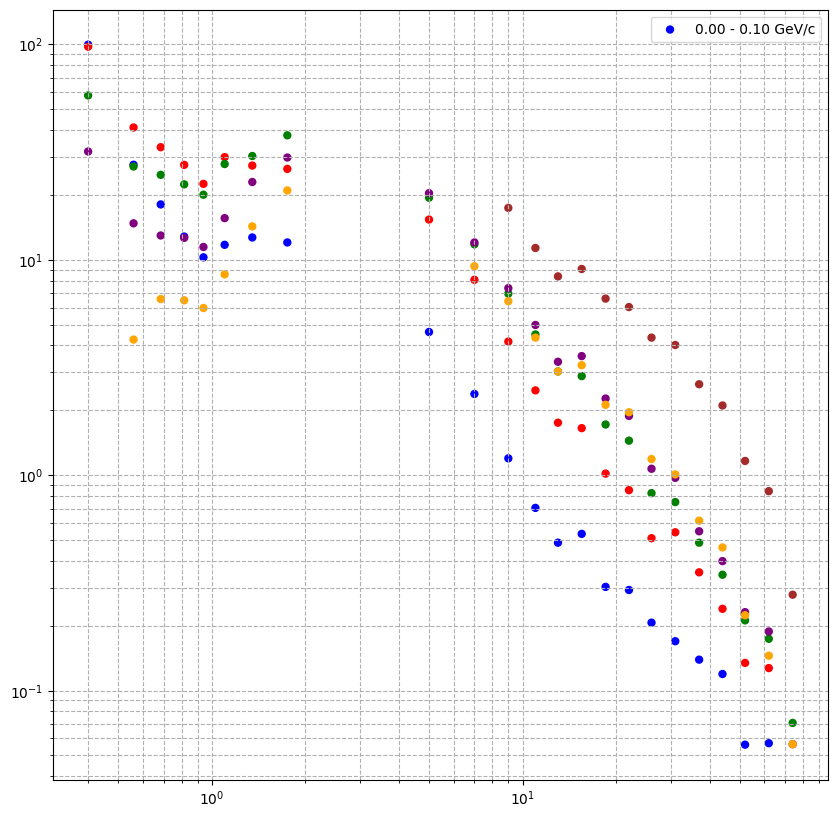

In [77]:
## Incorrect plot
colours = {  0 : "blue" , 1 : "red" , 2 : "green" , 3 : "purple" , 4 : "orange" , 5 : "brown"  }

labels = [ "0.00 - 0.10 GeV/c" , "0.10 - 0.20 GeV/c, N x 3.00"  ,  "0.20 - 0.30 GeV/c, N x 10.00"  ,  "0.30 - 0.40 GeV/c, N x 30.00"  ,  "0.40 - 0.50 GeV/c, N x 100.00"  ,  "0.50 - 2.00 GeV/c, N x 300.00"  ]

f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)

plt.scatter(   x = Pion_Plots_df1["pz (GeV=c) - mid range value"]   ,   y = Pion_Plots_df1["N_{\pi^+}/POT --- float"] * 300    ,   c = Pion_Plots_df1["pT (GeV=c) - plot colour codes"].map(colours) , s = 25  )

plt.xscale("log")
plt.yscale("log")
plt.grid( True , which = "both" , ls = "--" )

plt.legend(labels = [ "0.00 - 0.10 GeV/c" , "0.10 - 0.20 GeV/c, N x 3.00"  ,  "0.20 - 0.30 GeV/c, N x 10.00"  ,  "0.30 - 0.40 GeV/c, N x 30.00"  ,  "0.40 - 0.50 GeV/c, N x 100.00"  ,  "0.50 - 2.00 GeV/c, N x 300.00"  ])


plt.show()

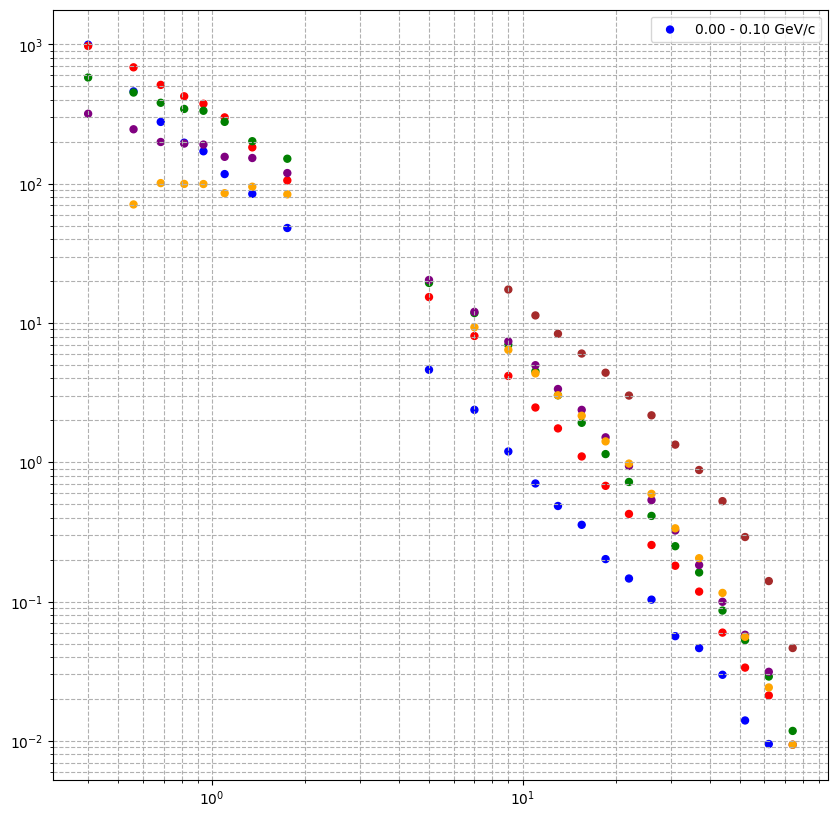

In [78]:
## Incomplete plot

colours = {  0 : "blue" , 1 : "red" , 2 : "green" , 3 : "purple" , 4 : "orange" , 5 : "brown"  }

labels = [ "0.00 - 0.10 GeV/c" , "0.10 - 0.20 GeV/c, N x 3.00"  ,  "0.20 - 0.30 GeV/c, N x 10.00"  ,  "0.30 - 0.40 GeV/c, N x 30.00"  ,  "0.40 - 0.50 GeV/c, N x 100.00"  ,  "0.50 - 2.00 GeV/c, N x 300.00"  ]

f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)

plt.scatter(   x = Pion_Plots_df1["pz (GeV=c) - mid range value"]   ,   y = Pion_Plots_df1["N_{\pi^+}/POT / bin width"] * 300    ,   c = Pion_Plots_df1["pT (GeV=c) - plot colour codes"].map(colours) , s = 25  )

plt.xscale("log")
plt.yscale("log")
plt.grid( True , which = "both" , ls = "--" )

plt.legend(labels = [ "0.00 - 0.10 GeV/c" , "0.10 - 0.20 GeV/c, N x 3.00"  ,  "0.20 - 0.30 GeV/c, N x 10.00"  ,  "0.30 - 0.40 GeV/c, N x 30.00"  ,  "0.40 - 0.50 GeV/c, N x 100.00"  ,  "0.50 - 2.00 GeV/c, N x 300.00"  ])


plt.show()

In [79]:
display(Pion_Plots_df1.head(5))

,pz (GeV=c),pz (GeV=c) - mid range value,bin width,pT (GeV=c) - plot colour codes,pT (GeV=c),N_{\pi^+}/POT --- float,N_{\pi^+}/POT / bin width,$N_{\pi^+}/POT$ (per proton on target),ðN(pi^+) stat + bkgd (%),ðN(pi^+) syst (%),$N_{\pi^-}/POT$ (per proton on target),ðN(pi^-) stat + bkgd (%),ðN(pi^-) syst (%),R = N(pi^-) / N(pi^+),ðR stat + bkgd (%),ðR syst (%)
1,"[0.30,0.50)",0.40,0.10,0,"[0.00,0.10)",0.332,3.320000,3.32E-01,0.97,9.77,2.76E-01,0.86,9.09,0.84,1.29,5.19
2,"[0.30,0.50)",0.40,0.10,1,"[0.10,0.20)",0.325,3.250000,3.25E-01,1.05,4.86,3.56E-01,0.75,4.93,1.08,1.29,4.64
3,"[0.30,0.50)",0.40,0.10,2,"[0.20,0.30)",0.193,1.930000,1.93E-01,1.46,5.30,1.91E-01,1.09,5.24,1,1.82,4.59
4,"[0.30,0.50)",0.40,0.10,3,"[0.30,0.40)",0.106,1.060000,1.06E-01,1.97,8.15,9.49E-02,1.68,7.39,0.95,2.59,4.61
5,"[0.50,0.62)",0.56,0.06,0,"[0.00,0.10)",0.092,1.533333,9.20E-02,1.22,5.10,7.54E-02,1.16,4.98,0.83,1.69,4.59


In [80]:
Pion_Plots_df1["Final pi^+ plot value"] = Pion_Plots_df1["N_{\pi^+}/POT / bin width"]


display(Pion_Plots_df1.head(5))

,pz (GeV=c),pz (GeV=c) - mid range value,bin width,pT (GeV=c) - plot colour codes,pT (GeV=c),N_{\pi^+}/POT --- float,N_{\pi^+}/POT / bin width,$N_{\pi^+}/POT$ (per proton on target),ðN(pi^+) stat + bkgd (%),ðN(pi^+) syst (%),$N_{\pi^-}/POT$ (per proton on target),ðN(pi^-) stat + bkgd (%),ðN(pi^-) syst (%),R = N(pi^-) / N(pi^+),ðR stat + bkgd (%),ðR syst (%),Final pi^+ plot value
1,"[0.30,0.50)",0.40,0.10,0,"[0.00,0.10)",0.332,3.320000,3.32E-01,0.97,9.77,2.76E-01,0.86,9.09,0.84,1.29,5.19,3.320000
2,"[0.30,0.50)",0.40,0.10,1,"[0.10,0.20)",0.325,3.250000,3.25E-01,1.05,4.86,3.56E-01,0.75,4.93,1.08,1.29,4.64,3.250000
3,"[0.30,0.50)",0.40,0.10,2,"[0.20,0.30)",0.193,1.930000,1.93E-01,1.46,5.30,1.91E-01,1.09,5.24,1,1.82,4.59,1.930000
4,"[0.30,0.50)",0.40,0.10,3,"[0.30,0.40)",0.106,1.060000,1.06E-01,1.97,8.15,9.49E-02,1.68,7.39,0.95,2.59,4.61,1.060000
5,"[0.50,0.62)",0.56,0.06,0,"[0.00,0.10)",0.092,1.533333,9.20E-02,1.22,5.10,7.54E-02,1.16,4.98,0.83,1.69,4.59,1.533333


In [81]:
for i in range( 1 , len(Pion_Plots_df1["pT (GeV=c) - plot colour codes"] ) ):
  if Pion_Plots_df1["pT (GeV=c) - plot colour codes"][i] == 0:
    Pion_Plots_df1["Final pi^+ plot value"][i] = Pion_Plots_df1["N_{\pi^+}/POT / bin width"][i]
  elif Pion_Plots_df1["pT (GeV=c) - plot colour codes"][i] == 1:
    Pion_Plots_df1["Final pi^+ plot value"][i] = Pion_Plots_df1["N_{\pi^+}/POT / bin width"][i] * 3
  elif Pion_Plots_df1["pT (GeV=c) - plot colour codes"][i] == 2:
    Pion_Plots_df1["Final pi^+ plot value"][i] = Pion_Plots_df1["N_{\pi^+}/POT / bin width"][i] * 10
  elif Pion_Plots_df1["pT (GeV=c) - plot colour codes"][i] == 3:
    Pion_Plots_df1["Final pi^+ plot value"][i] = Pion_Plots_df1["N_{\pi^+}/POT / bin width"][i] * 30
  elif Pion_Plots_df1["pT (GeV=c) - plot colour codes"][i] == 4:
    Pion_Plots_df1["Final pi^+ plot value"][i] = Pion_Plots_df1["N_{\pi^+}/POT / bin width"][i] * 100
  else:
    Pion_Plots_df1["Final pi^+ plot value"][i] = Pion_Plots_df1["N_{\pi^+}/POT / bin width"][i] * 300

<ipython-input-81-882512ad7417>:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  Pion_Plots_df1["Final pi^+ plot value"][i] = Pion_Plots_df1["N_{\pi^+}/POT / bin width"][i]
<ipython-input-81-882512ad7417>:3: SettingWithCopyWarning: 
A value 

In [82]:
display(Pion_Plots_df1.head(5))

,pz (GeV=c),pz (GeV=c) - mid range value,bin width,pT (GeV=c) - plot colour codes,pT (GeV=c),N_{\pi^+}/POT --- float,N_{\pi^+}/POT / bin width,$N_{\pi^+}/POT$ (per proton on target),ðN(pi^+) stat + bkgd (%),ðN(pi^+) syst (%),$N_{\pi^-}/POT$ (per proton on target),ðN(pi^-) stat + bkgd (%),ðN(pi^-) syst (%),R = N(pi^-) / N(pi^+),ðR stat + bkgd (%),ðR syst (%),Final pi^+ plot value
1,"[0.30,0.50)",0.40,0.10,0,"[0.00,0.10)",0.332,3.320000,3.32E-01,0.97,9.77,2.76E-01,0.86,9.09,0.84,1.29,5.19,3.320000
2,"[0.30,0.50)",0.40,0.10,1,"[0.10,0.20)",0.325,3.250000,3.25E-01,1.05,4.86,3.56E-01,0.75,4.93,1.08,1.29,4.64,9.750000
3,"[0.30,0.50)",0.40,0.10,2,"[0.20,0.30)",0.193,1.930000,1.93E-01,1.46,5.30,1.91E-01,1.09,5.24,1,1.82,4.59,19.300000
4,"[0.30,0.50)",0.40,0.10,3,"[0.30,0.40)",0.106,1.060000,1.06E-01,1.97,8.15,9.49E-02,1.68,7.39,0.95,2.59,4.61,31.800000
5,"[0.50,0.62)",0.56,0.06,0,"[0.00,0.10)",0.092,1.533333,9.20E-02,1.22,5.10,7.54E-02,1.16,4.98,0.83,1.69,4.59,1.533333


In [83]:

column_to_move = Pion_Plots_df1.pop("Final pi^+ plot value")
Pion_Plots_df1.insert(8, "Final pi^+ plot value", column_to_move)

column_to_move = Pion_Plots_df1.pop("$N_{\pi^+}/POT$ (per proton on target)")
Pion_Plots_df1.insert(5, "$N_{\pi^+}/POT$ (per proton on target)", column_to_move)

column_to_move = Pion_Plots_df1.pop("$N_{\pi^+}/POT$ (per proton on target)")
Pion_Plots_df1.insert(5, "$N_{\pi^+}/POT$ (per proton on target)", column_to_move)

display(Pion_Plots_df1.head(5))


,pz (GeV=c),pz (GeV=c) - mid range value,bin width,pT (GeV=c) - plot colour codes,pT (GeV=c),$N_{\pi^+}/POT$ (per proton on target),N_{\pi^+}/POT --- float,N_{\pi^+}/POT / bin width,Final pi^+ plot value,ðN(pi^+) stat + bkgd (%),ðN(pi^+) syst (%),$N_{\pi^-}/POT$ (per proton on target),ðN(pi^-) stat + bkgd (%),ðN(pi^-) syst (%),R = N(pi^-) / N(pi^+),ðR stat + bkgd (%),ðR syst (%)
1,"[0.30,0.50)",0.40,0.10,0,"[0.00,0.10)",3.32E-01,0.332,3.320000,3.320000,0.97,9.77,2.76E-01,0.86,9.09,0.84,1.29,5.19
2,"[0.30,0.50)",0.40,0.10,1,"[0.10,0.20)",3.25E-01,0.325,3.250000,9.750000,1.05,4.86,3.56E-01,0.75,4.93,1.08,1.29,4.64
3,"[0.30,0.50)",0.40,0.10,2,"[0.20,0.30)",1.93E-01,0.193,1.930000,19.300000,1.46,5.30,1.91E-01,1.09,5.24,1,1.82,4.59
4,"[0.30,0.50)",0.40,0.10,3,"[0.30,0.40)",1.06E-01,0.106,1.060000,31.800000,1.97,8.15,9.49E-02,1.68,7.39,0.95,2.59,4.61
5,"[0.50,0.62)",0.56,0.06,0,"[0.00,0.10)",9.20E-02,0.092,1.533333,1.533333,1.22,5.10,7.54E-02,1.16,4.98,0.83,1.69,4.59


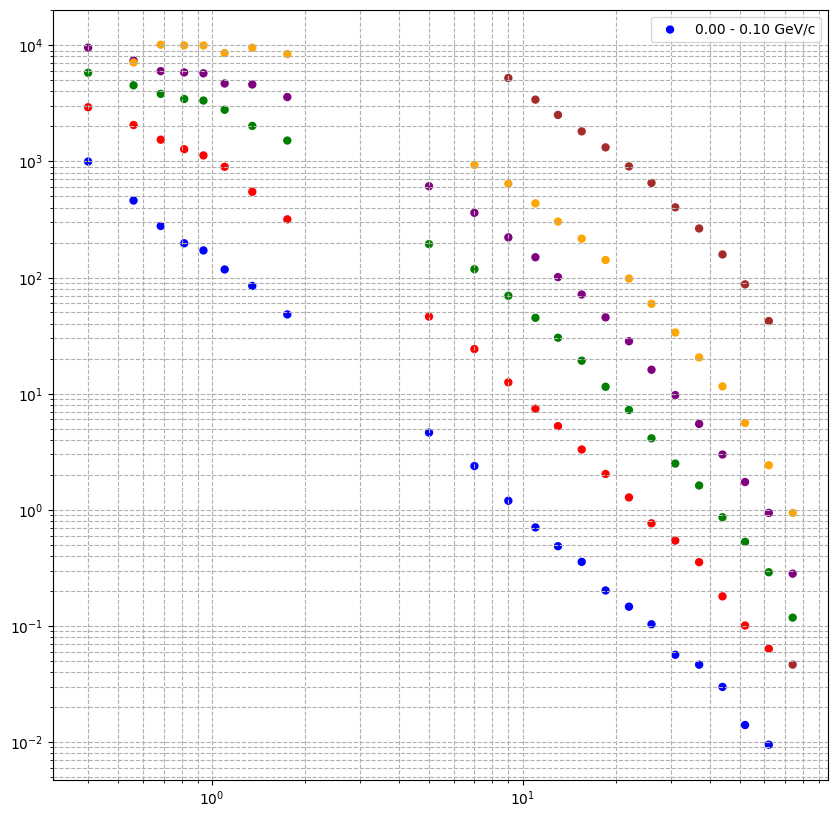

In [91]:
## Correct and complete plot

colours = {  0 : "blue" , 1 : "red" , 2 : "green" , 3 : "purple" , 4 : "orange" , 5 : "brown"  }

labels_list = [ "0.00 - 0.10 GeV/c" , "0.10 - 0.20 GeV/c, N x 3.00"  ,  "0.20 - 0.30 GeV/c, N x 10.00"  ,  "0.30 - 0.40 GeV/c, N x 30.00"  ,  "0.40 - 0.50 GeV/c, N x 100.00"  ,  "0.50 - 2.00 GeV/c, N x 300.00"  ]

f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)

plt.scatter(   x = Pion_Plots_df1["pz (GeV=c) - mid range value"]   ,   y = Pion_Plots_df1["Final pi^+ plot value"] * 300    ,   c = Pion_Plots_df1["pT (GeV=c) - plot colour codes"].map(colours) , s = 25 , label =  labels_list )

plt.xscale("log")
plt.yscale("log")
plt.grid( True , which = "both" , ls = "--" )

plt.legend(labels = labels_list)

plt.show()

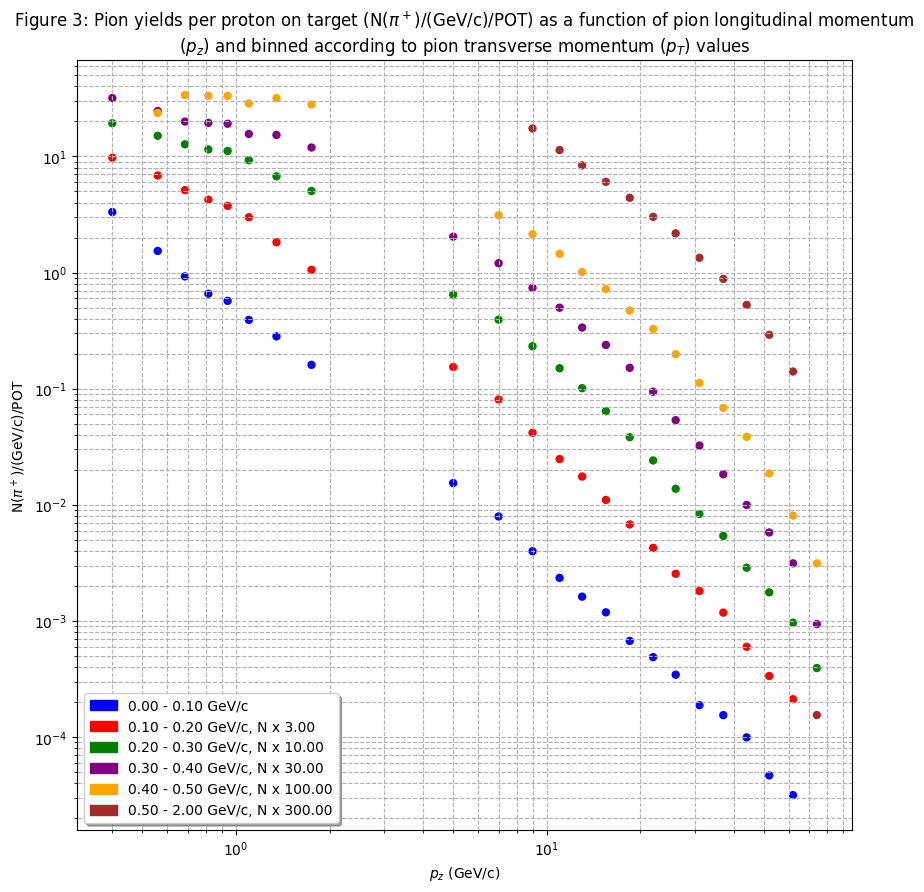

In [145]:
## Correct and complete plot

colours = {  0 : "blue" , 1 : "red" , 2 : "green" , 3 : "purple" , 4 : "orange" , 5 : "brown"  }

labels_list = [ "0.00 - 0.10 GeV/c" , "0.10 - 0.20 GeV/c, N x 3.00"  ,  "0.20 - 0.30 GeV/c, N x 10.00"  ,  "0.30 - 0.40 GeV/c, N x 30.00"  ,  "0.40 - 0.50 GeV/c, N x 100.00"  ,  "0.50 - 2.00 GeV/c, N x 300.00"  ]

## I'd really appreciate some insight into a more "pythonic" way to code this legend handles stuff.

blue_patch = mpatches.Patch(color='blue', label='0.00 - 0.10 GeV/c' )
red_patch = mpatches.Patch(color='red', label='0.10 - 0.20 GeV/c, N x 3.00')
green_patch = mpatches.Patch(color='green', label='0.20 - 0.30 GeV/c, N x 10.00')
purple_patch = mpatches.Patch(color='purple', label='0.30 - 0.40 GeV/c, N x 30.00')
orange_patch = mpatches.Patch(color='orange', label='0.40 - 0.50 GeV/c, N x 100.00')
brown_patch = mpatches.Patch(color='brown', label='0.50 - 2.00 GeV/c, N x 300.00')

# line1 = Line2D([], [], color="white", marker='o', markerfacecolor="blue" , label='0.00 - 0.10 GeV/c' )
# line2 = Line2D([], [], color="white", marker='o', markerfacecolor="red" , label='0.10 - 0.20 GeV/c, N x 3.00')
# line3 = Line2D([], [], color="white", marker='o', markersize=5,  markerfacecolor="green" , label='0.20 - 0.30 GeV/c, N x 10.00')
# line4 = Line2D([], [], color="white", marker='o', markersize=10, markerfacecolor="purple" , label='0.30 - 0.40 GeV/c, N x 30.00')
# line5 = Line2D([], [], color="white", marker='o', markerfacecolor="orange", label='0.40 - 0.50 GeV/c, N x 100.00')
# line6 = Line2D([], [], color="white", marker='o', markerfacecolor="brown", label='0.50 - 2.00 GeV/c, N x 300.00')




handles_for_legend =  [  blue_patch , red_patch ,  green_patch ,  purple_patch , orange_patch , brown_patch  ]


# circles_this_time = [   line1 , line2 ,  line3 ,  line4 , line5 , line6  ]


f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)

## I think there is an incorrect multiple of 300 in this line ## plt.scatter(   x = Pion_Plots_df1["pz (GeV=c) - mid range value"]   ,   y = Pion_Plots_df1["Final pi^+ plot value"] * 300    ,   c = Pion_Plots_df1["pT (GeV=c) - plot colour codes"].map(colours) , s = 25 , label =  labels_list )

plt.scatter(   x = Pion_Plots_df1["pz (GeV=c) - mid range value"]   ,   y = Pion_Plots_df1["Final pi^+ plot value"]    ,   c = Pion_Plots_df1["pT (GeV=c) - plot colour codes"].map(colours) , s = 25 , label =  labels_list )

#plt.errorbar( x = Pion_Plots_df1["pz (GeV=c) - mid range value"] , y = Pion_Plots_df1["Final pi^+ plot value"] * 300 , yerr  =  None , xerr = Pion_Plots_df1["bin width"] , ecolor = Pion_Plots_df1["pT (GeV=c) - plot colour codes"] )

#plt.errorbar( x = Pion_Plots_df1["pz (GeV=c) - mid range value"] , y = Pion_Plots_df1["Final pi^+ plot value"] * 300 , yerr  =  None , xerr = Pion_Plots_df1["bin width"] )


plt.xscale("log")
plt.yscale("log")
plt.grid( True , which = "both" , ls = "--" )

plt.legend(  labels = labels_list , handles = handles_for_legend , shadow = True , fancybox = True )


# plt.legend( handles = circles_this_time )

plt.title("\n".join(wrap(r"Figure 3: Pion yields per proton on target (N($\pi^+$)/(GeV/c)/POT) as a function of pion longitudinal momentum ($p_{z}$) and binned according to pion transverse momentum ($p_{T}$) values" , 120 ) ) )


plt.xlabel(r"$p_{z}$ (GeV/c)")
plt.ylabel(r"N($\pi^+$)/(GeV/c)/POT")

plt.savefig('Figure 3: Positive pion yields per proton on target - binned according to pion longitudinal and transverse momenta .png' , dpi=200 , bbox_inches = "tight")

plt.show()

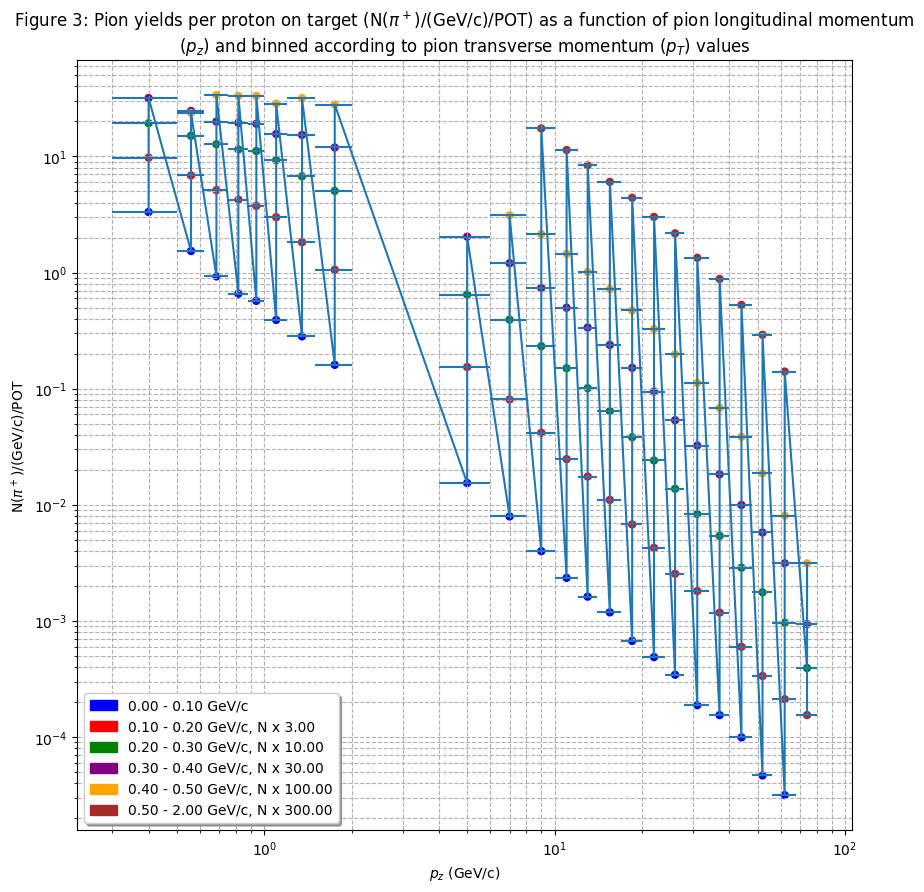

In [147]:
## TRYING TO ADD ERROR BARS THAT SHOW BIN WIDTH!!!!! ###
## Correct and complete plot

colours = {  0 : "blue" , 1 : "red" , 2 : "green" , 3 : "purple" , 4 : "orange" , 5 : "brown"  }

labels_list = [ "0.00 - 0.10 GeV/c" , "0.10 - 0.20 GeV/c, N x 3.00"  ,  "0.20 - 0.30 GeV/c, N x 10.00"  ,  "0.30 - 0.40 GeV/c, N x 30.00"  ,  "0.40 - 0.50 GeV/c, N x 100.00"  ,  "0.50 - 2.00 GeV/c, N x 300.00"  ]

## I'd really appreciate some insight into a more "pythonic" way to code this legend handles stuff.

blue_patch = mpatches.Patch(color='blue', label='0.00 - 0.10 GeV/c' )
red_patch = mpatches.Patch(color='red', label='0.10 - 0.20 GeV/c, N x 3.00')
green_patch = mpatches.Patch(color='green', label='0.20 - 0.30 GeV/c, N x 10.00')
purple_patch = mpatches.Patch(color='purple', label='0.30 - 0.40 GeV/c, N x 30.00')
orange_patch = mpatches.Patch(color='orange', label='0.40 - 0.50 GeV/c, N x 100.00')
brown_patch = mpatches.Patch(color='brown', label='0.50 - 2.00 GeV/c, N x 300.00')

# line1 = Line2D([], [], color="white", marker='o', markerfacecolor="blue" , label='0.00 - 0.10 GeV/c' )
# line2 = Line2D([], [], color="white", marker='o', markerfacecolor="red" , label='0.10 - 0.20 GeV/c, N x 3.00')
# line3 = Line2D([], [], color="white", marker='o', markersize=5,  markerfacecolor="green" , label='0.20 - 0.30 GeV/c, N x 10.00')
# line4 = Line2D([], [], color="white", marker='o', markersize=10, markerfacecolor="purple" , label='0.30 - 0.40 GeV/c, N x 30.00')
# line5 = Line2D([], [], color="white", marker='o', markerfacecolor="orange", label='0.40 - 0.50 GeV/c, N x 100.00')
# line6 = Line2D([], [], color="white", marker='o', markerfacecolor="brown", label='0.50 - 2.00 GeV/c, N x 300.00')




handles_for_legend =  [  blue_patch , red_patch ,  green_patch ,  purple_patch , orange_patch , brown_patch  ]


# circles_this_time = [   line1 , line2 ,  line3 ,  line4 , line5 , line6  ]


f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)

plt.scatter(   x = Pion_Plots_df1["pz (GeV=c) - mid range value"]   ,   y = Pion_Plots_df1["Final pi^+ plot value"]    ,   c = Pion_Plots_df1["pT (GeV=c) - plot colour codes"].map(colours) , s = 25 , label =  labels_list )


#plt.errorbar( x = Pion_Plots_df1["pz (GeV=c) - mid range value"] , y = Pion_Plots_df1["Final pi^+ plot value"] * 300 , yerr  =  None , xerr = Pion_Plots_df1["bin width"] , ecolor = Pion_Plots_df1["pT (GeV=c) - plot colour codes"] )

plt.errorbar( x = Pion_Plots_df1["pz (GeV=c) - mid range value"] , y = Pion_Plots_df1["Final pi^+ plot value"], yerr  =  None , xerr = Pion_Plots_df1["bin width"] )


plt.xscale("log")
plt.yscale("log")
plt.grid( True , which = "both" , ls = "--" )

plt.legend(  labels = labels_list , handles = handles_for_legend , shadow = True , fancybox = True )


# plt.legend( handles = circles_this_time )

plt.title("\n".join(wrap(r"Figure 3: Pion yields per proton on target (N($\pi^+$)/(GeV/c)/POT) as a function of pion longitudinal momentum ($p_{z}$) and binned according to pion transverse momentum ($p_{T}$) values" , 120 ) ) )


plt.xlabel(r"$p_{z}$ (GeV/c)")
plt.ylabel(r"N($\pi^+$)/(GeV/c)/POT")

plt.show()

###To correct this plot you must divide the Npi^+ values by the bin width and multiply by the factors that appear in the legend of the other graph.  DONE
###Do I need to produce the analagous plot for negative pions.  If not, why not?  Need some theoretical background on this.
###You must then find a way to produce a regressor, or fitter or interpolator of some sort to produce a curve that mimics this plot.  
###This curve is a continuous function that may then be used to assign weight values to each and every pion produced in my simulation.
###NOTE: You are summing all the curves in th eabove log log plot to form your weight function.  The reason for this is because we are not considering transverse momentum as a parameter in this simulation.  Doing so would add significant complexity to the model.  Adding the transverse momentum of the pions as a parameter could be work for later.
###Try and get to the bottom of the "chain indexing issue", by modifying the dataframe in a way that pandas likes - i.e., in a way that Pandas 3.0 will allow you.
/

-----------------------------------------------------------------------
-----------------------------------------------------------------------

###AFTER you have done all the above... FOCUS on the below...

-----------------------------------------------------------------------
-----------------------------------------------------------------------
/


###You must then begin to incoporate the trigonometry of the off axis beam and the different segments of the near detector into the simulation.  

###You must then produce histograms for each of these different slithers of the near detector and comapre them to the literature.

###If the peaks of the histograms occur in the correct location (in terms of the x-axis), but they are too high or too low, then you must normalise them accordingly.

###Then you have the beginnings of a rudimentary beam simulation, and can then begin thinking about complexifying it by adding parameters.  For example, you could incorporate the magnitude of the transverse momentum into your simulation.  Currently we are not considering transverse momentum as a parameter.

/
-----------------------------------------------------------------------
-----------------------------------------------------------------------


In [153]:
## Interpolation ##
display(Pion_Plots_df1)
## 0.20 - 0.30 is green
green_dots_only_y_axis_values_list = list( Pion_Plots_df1 [Pion_Plots_df1 ['pT (GeV=c) - plot colour codes'] == 2  ]['Final pi^+ plot value'] )

#display(Pion_Plots_df1.columns)

green_dots_only_x_axis_values_list = list( Pion_Plots_df1 [Pion_Plots_df1 ['pT (GeV=c) - plot colour codes'] == 2  ]['pz (GeV=c) - mid range value'] )

,pz (GeV=c),pz (GeV=c) - mid range value,bin width,pT (GeV=c) - plot colour codes,pT (GeV=c),$N_{\pi^+}/POT$ (per proton on target),N_{\pi^+}/POT --- float,N_{\pi^+}/POT / bin width,Final pi^+ plot value,ðN(pi^+) stat + bkgd (%),ðN(pi^+) syst (%),$N_{\pi^-}/POT$ (per proton on target),ðN(pi^-) stat + bkgd (%),ðN(pi^-) syst (%),R = N(pi^-) / N(pi^+),ðR stat + bkgd (%),ðR syst (%)
1,"[0.30,0.50)",0.40,0.10,0,"[0.00,0.10)",3.32E-01,0.332000,3.320000,3.320000,0.97,9.77,2.76E-01,0.86,9.09,0.84,1.29,5.19
2,"[0.30,0.50)",0.40,0.10,1,"[0.10,0.20)",3.25E-01,0.325000,3.250000,9.750000,1.05,4.86,3.56E-01,0.75,4.93,1.08,1.29,4.64
3,"[0.30,0.50)",0.40,0.10,2,"[0.20,0.30)",1.93E-01,0.193000,1.930000,19.300000,1.46,5.30,1.91E-01,1.09,5.24,1,1.82,4.59
4,"[0.30,0.50)",0.40,0.10,3,"[0.30,0.40)",1.06E-01,0.106000,1.060000,31.800000,1.97,8.15,9.49E-02,1.68,7.39,0.95,2.59,4.61
5,"[0.50,0.62)",0.56,0.06,0,"[0.00,0.10)",9.20E-02,0.092000,1.533333,1.533333,1.22,5.10,7.54E-02,1.16,4.98,0.83,1.69,4.59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,"[56.00,68.00)",62.00,6.00,5,"[0.50,2.00)",2.81E-03,0.002810,0.000468,0.140500,2.77,4.79,1.03E-03,4.51,5.04,0.36,5.29,4.58
121,"[68.00,80.00)",74.00,6.00,2,"[0.20,0.30)",2.36E-04,0.000236,0.000039,0.000393,10.32,5.45,NaN,NaN,NaN,NaN,NaN,NaN
122,"[68.00,80.00)",74.00,6.00,3,"[0.30,0.40)",1.88E-04,0.000188,0.000031,0.000940,10.39,4.89,NaN,NaN,NaN,NaN,NaN,NaN
123,"[68.00,80.00)",74.00,6.00,4,"[0.40,0.50)",1.88E-04,0.000188,0.000031,0.003133,10.15,4.80,NaN,NaN,NaN,NaN,NaN,NaN


In [162]:
display(green_dots_only_x_axis_values_list)
display(max(green_dots_only_x_axis_values_list))
display(min(green_dots_only_x_axis_values_list))


[0.4,
 0.56,
 0.685,
 0.815,
 0.94,
 1.1,
 1.35,
 1.75,
 5.0,
 7.0,
 9.0,
 11.0,
 13.0,
 15.5,
 18.5,
 22.0,
 26.0,
 31.0,
 37.0,
 44.0,
 52.0,
 62.0,
 74.0]

74.0

0.4

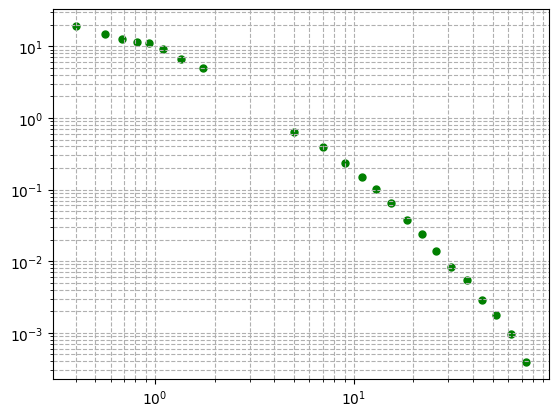

In [159]:
# display(len(green_dots_only_y_axis_values_list))
# display(len(green_dots_only_x_axis_values_list))

# display(type(green_dots_only_y_axis_values_list[1]))



plt.scatter(   x = green_dots_only_x_axis_values_list   ,   y = green_dots_only_y_axis_values_list    ,   c = "green" , s = 25 , label =  '0.20 - 0.30 GeV/c, N x 10.00' )

plt.xscale("log")
plt.yscale("log")

plt.grid( True , which = "both" , ls = "--" )

green_dots_only_x_array = np.array(green_dots_only_x_axis_values_list)
green_dots_only_y_array = np.array(green_dots_only_y_axis_values_list)
xnew_array = np.linspace(min(green_dots_only_x_axis_values_list), max(green_dots_only_x_axis_values_list), 100)

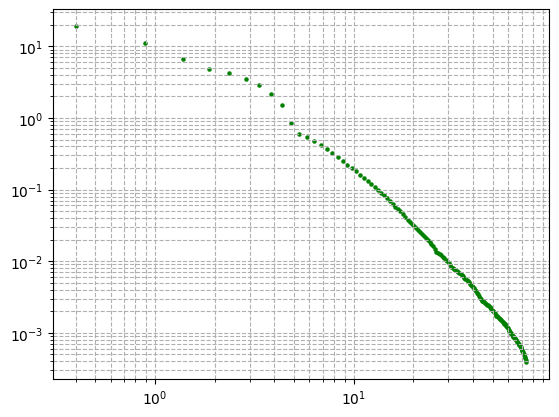

In [170]:
green_dots_only_x_array = np.array(green_dots_only_x_axis_values_list)
green_dots_only_y_array = np.array(green_dots_only_y_axis_values_list)
xnew_array = np.linspace(min(green_dots_only_x_axis_values_list), max(green_dots_only_x_axis_values_list), 150)
ynew_array = np.interp( xnew_array , green_dots_only_x_array , green_dots_only_y_array )

plt.scatter(   x = xnew_array   ,   y = ynew_array    ,   c = "green" , s = 5 , label =  '0.20 - 0.30 GeV/c, N x 10.00' )

plt.xscale("log")
plt.yscale("log")

plt.grid( True , which = "both" , ls = "--" )


Ideas:
interp1d

In [197]:
f = interpolate.interp1d(   green_dots_only_x_array  ,    green_dots_only_y_array , kind = 'cubic'   )

### kind argument options: ‘linear’, ‘nearest’, ‘nearest-up’, ‘zero’, ‘slinear’, ‘quadratic’, ‘cubic’, ‘previous’, or ‘next’. ‘zero’, ‘slinear’, ‘quadratic’ and ‘cubic’

display(type(f))

scipy.interpolate._interpolate.interp1d

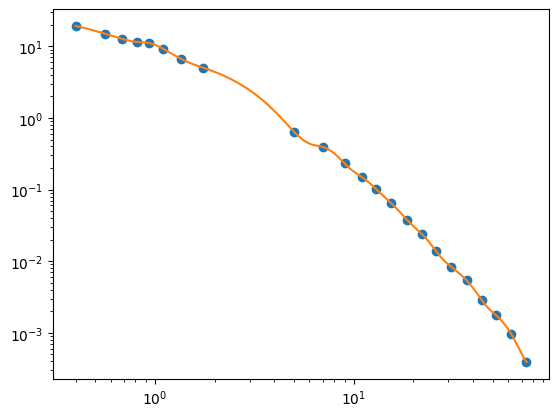

In [198]:
xnew_array_interp1d = np.linspace(min(green_dots_only_x_axis_values_list), max(green_dots_only_x_axis_values_list), 1000)
ynew_array_interp1d = f(xnew_array_interp1d)

plt.plot(  green_dots_only_x_array  , green_dots_only_y_array  ,  'o'   , xnew_array_interp1d  , ynew_array_interp1d   , '-')


plt.xscale("log")
plt.yscale("log")

plt.show()

## I need to alter the "kind" argumment in interpolate.interp1d()

Ideas: sklearn.linear_model

In [ ]:
Detector_Extents_df = pd.read_csv('Detector Extents - CSV.csv')


##Trigonometry Time

###NOvA detectors are 14.6mrad off-axis from the NuMI beam

In [ ]:
display(Detector_Extents_df)

,QUANTITY,Min (cm),Max (cm)
0,X,-191,192
1,Y,-187,194
2,Z,0,1587
3,Z (active),0,1270


In [ ]:
A = np.array(Pion_Plots_df1['pz (GeV=c)'])

B = np.array(Pion_Plots_df1['$N_{\pi^+}/POT$ (per proton on target)'])

#A = np.mean(A , axis = 1)

print(type(A[0]))

#print(A[0] , B[0])


<class 'str'>


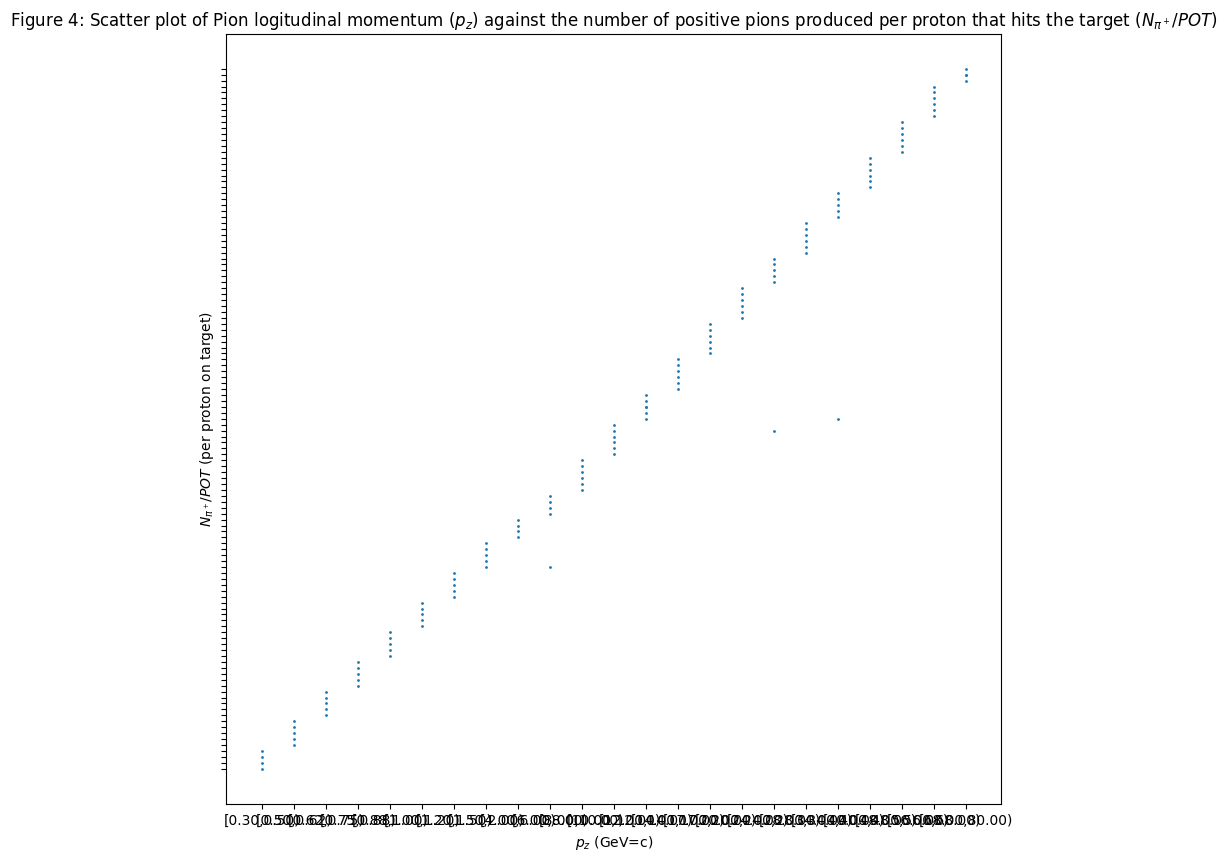

In [ ]:
#display(Pion_Plots_df3['pz (GeV=c)'])

plt.figure(figsize=(10, 10))

plt.scatter( x = A, y =B , s = 1 )


plt.tick_params(
    axis= 'both' ,          # changes apply to both axes
    which='both',      # both major and minor ticks are affected
    bottom=True,      # ticks along the bottom edge are off
    top=False,
    left = True,
    labelbottom=True,
    labelleft = False) # labels along the bottom edge are off


plt.title(r"Figure 4: Scatter plot of Pion logitudinal momentum ($p_{z}$) against the number of positive pions produced per proton that hits the target ($N_{\pi^+}/POT$)")


plt.xlabel(r"$p_{z}$ (GeV=c)")
plt.ylabel(r"$N_{\pi^+}/POT$ (per proton on target)")


plt.show()

In [ ]:

# I did not expect to get this plot
# I expected a negative correlation
# I have misunderstood what columns are being plotted against one naother in Figures 13a and 13b in the "Pion Plots Paper"

### How did they generate Figures 13a and 13b?



In [ ]:
# display(Pion_Plots_df2)

,0,1,2,3,4,5,6,7,8,9,10
2,"[0.30,0.50)","[0.00,0.10)",3.32E-01,0.97,9.77,2.76E-01,0.86,9.09,0.84,1.29,5.19
3,"[0.30,0.50)","[0.10,0.20)",3.25E-01,1.05,4.86,3.56E-01,0.75,4.93,1.08,1.29,4.64
4,"[0.30,0.50)","[0.20,0.30)",1.93E-01,1.46,5.30,1.91E-01,1.09,5.24,1,1.82,4.59
5,"[0.30,0.50)","[0.30,0.40)",1.06E-01,1.97,8.15,9.49E-02,1.68,7.39,0.95,2.59,4.61
6,"[0.50,0.62)","[0.00,0.10)",9.20E-02,1.22,5.10,7.54E-02,1.16,4.98,0.83,1.69,4.59
...,...,...,...,...,...,...,...,...,...,...,...
121,"[56.00,68.00)","[0.50,2.00)",2.81E-03,2.77,4.79,1.03E-03,4.51,5.04,0.36,5.29,4.58
122,"[68.00,80.00)","[0.20,0.30)",2.36E-04,10.32,5.45,NaN,NaN,NaN,NaN,NaN,NaN
123,"[68.00,80.00)","[0.30,0.40)",1.88E-04,10.39,4.89,NaN,NaN,NaN,NaN,NaN,NaN
124,"[68.00,80.00)","[0.40,0.50)",1.88E-04,10.15,4.80,NaN,NaN,NaN,NaN,NaN,NaN



#TARGET: WRITE INTRODUCTION, INCLUDING THEORY
#TARGET: DO ALL THE CODING WORK ABOVE
#TARGET: BEGIN COMPILING AN OVERLEAF DOCUMENT WITH ALL MY PLOTS, ALL MY REFERENCES, ALL MY RESEARCH AND ALL MY QUESTIONS.
/

-----------------------------------------------------------------------
#CHECKPOINT DEADLINES:
-----------------------------------------------------------------------

/
##CHECKPOINT 1: WEEK 11
##CHECKPOINT 2: SEMB WEEK 6
##CHECKPOINT 3: SEMB WEEK 11

/

-----------------------------------------------------------------------
#STUFF TO INCLUDE IN THE INTRODUCTION:
-----------------------------------------------------------------------


###The neutrinos are in a dense medium in the sun.  They oscillate.  The density of the sun influences these oscillations.  Upon reaching the surface of the Sun, the neutrinos find themselves in a mass eigenstate.

###They travel through the vacuum of space, they do not oscillate.  They are in a linear, coherent superposition of flavour eigenstates.  If you measure what flavour the neutrino is on Earth, you will have a probability of measuring a particular flavour eigenstate.

###If the neutrino were to then continue propagating (which it does not - after all, it has interacted with you when you went to measure it) - you would see the neutrino oscillate through mass eigenstates - just as it was doing inside the Sun.

###Inside the Sun the oscillations are different to what they would be of this neutrino oscillating on Earth after you have measured it.

###This difference in oscillations is due to the density of the media through which the neutrino passes.

###The mass eignestate governs how the neutrino wave function experiences time.


### I DO NOT UNDERSTAND WHAT EXACTLY IS MEANT BY THE TERM "OSCILLATION" HOW IS THIS DISTNCT FROM SUPERPOSITION.  WHY IS IT THAT NEUTRINOS IN MASS EIGENSTATES DON'T OSCILLATE IN TERMS OF THEIR FLAVOUR EIGENSTATES (BUT THEY ARE IN A SUPERPOSITION OF FLAVOUR EIGENSTATES).  IT SEEMS TO BE THAT WE ONLY REFER TO OSCILLATIONS IN THE CONTEXT OF MASS EIGENSTATES????? AND NOT FLAVOUR EIGENSTATES.   



DENSE MEDIUM LEAVES SUN TRAVELS
INTRO TO OSCILLATIONS AND
INTRO TO NOVA EXPERIMENT

